## Final Project Submission

Please fill out: 
* Student name:   

                  1. Kelvin Mutua

                  2. Hannah Nyambura 

                  3. Samwel Kipkemboi

                  4. Brian Kanyenje

                  5. Calistus Mwonga
                 
* Student pace:      HYBRID
* Scheduled project review date/time: 
* Instructor name:     SAMUEL KARU
* Blog post URL:


# MICROSOFT MOVIE STUDIO INSIGHT
---


### Project Overview
- The aim of this project is to analyze which type of films are currently doing the best at the box office to help the company decide which type of films to create.

### Business Problem
With many different companies getting into the movie industry, Microsoft has also decided to join the movement by creating its own film studio. However, as a tech company with little to no knowledge when it comes to the film industry, Microsoft is faced with significant challenges such as: 
* identifying the types of films currently performing well
* understanding the factors that make a film successful

This project will solve these problems by analyzing the current trends in the film industry and translating those insights into tangible recommendationsi in order to make Microsoft's debut into the film industry successful. By examining what films and genres are rated higly as well as gross highly, he research will provide integral insight into the ingredients that make a film studio successful. All this tanslates to the amount of returns generated by the film studio.

The primary stakeholders of this project are the head of Microsoft's film studio and the production team. The insight generated by this project will guide the heads of the film industry to make informed decisions that will ensure the films produced align with the market demand. The insight will also be used by the production team in order to know which genres to capitalize on and which production styles to use. 

In conclusion, this project is very fundamental to Microsoft as it will provide important insight that will make their insertion into the film industry successful.



### Objectives
The objectives of the analysis are:
* To determine which movie genres perform highly in terms of revenue and viewer rating.
* To determine which directors and actors are linked to the highest performing movies.
* To determine whether movie budget affects the overall performance of a movie.

### Project Goals

- To identify the key factors that drive movie success (financially and with audiences) in order to guide the new movie studio on what types of films to produce, invest in, and promote.

## Importing the necessary libraries

In [1]:
import pandas as pd
import gzip
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import matplotlib.ticker as ticker

## Loading Datasets

The datasets used in this project are:
* im.db database - this dataset contains information about movies, including their titles, genres, movie crew and ratings.
* movie_budgets.csv - this dataset contains information about the budgets of various movies as well as their box office earnings.


### 1. im.db Database

In [2]:
# Unzip the archive manually 
import zipfile
import os

zip_path = './zippedData/im.db.zip'  # replace with actual file
extract_path = './zippedData/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Unzipping done!")


Unzipping done!


Let's start by loading the im.db database and checking its contents:

In [3]:
# Load the imdb database
conn = sqlite3.connect('./zippedData/im.db')
pd.read_sql("SELECT name FROM sqlite_master WHERE type=='table';" ,conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


This database contains multipletables. However,we are only interested in select tables for this analysis which are:
>* movie_basics
>* directors
>* movie_ratings
>* persons

Let's preview the contents of these tables:

In [4]:
# loading movie_ratings table
pd.read_sql("SELECT * FROM movie_ratings", conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


This table contains information about the movie id, the movie's average rating and the number of votes received. The movie_id is the primary key and is used to join with other tables.

In [5]:
# display movie_basics table
pd.read_sql("SELECT * FROM movie_basics", conn).head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


This table contains information about the movie id, the movie's primary and original title, the start year, the length of the movie and the genre category in which the movie falls under. The movie_id is also the primary key and will be used to join with other tables.

In [6]:
# display persons table
pd.read_sql("SELECT * FROM persons", conn).head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


This table contains information about the people involved in each movie, including their names, birth year, death year and their pripary profession(actor, director, producer etc). The person_id is the primary key.

In [7]:
# display directors table
pd.read_sql("SELECT * FROM directors", conn).head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


### 2. tn.movie_budgets Dataset

In [8]:
# Load the tn.movie_budgets dataset
movie_budgets = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz', compression='gzip', index_col='id')
movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


This csv file contains information about the budgets of various movies as well as their box office earnings. The columns in this dataset include:
* id - the unique identifier for each movie
* movie - the title of the movie
* production_budget - the budget allocated for the movie's production
* domestic_gross - the gross earnings from the movie in the domestic market
* worldwide_gross - the gross earnings from the movie in the worldwide market

# Data Cleaning

### 1. imdb Dataset

For faster data cleaning, we will first create a function that helps us check if the tables in the database have any duplicate or missing values:

In [9]:
#Create a function to check for duplicates in a table
def duplicates(table_name): #defines a function named duplicates that takes one input parameter:
    return pd.read_sql(f"SELECT * FROM {table_name}", conn).duplicated().sum()

`.duplicated()`
This Pandas method returns a Boolean Series that flags whether each row in the DataFrame is a duplicate of a previous row (based on all columns by default).

Count of Duplicates and Non-Duplicates
`.value_counts()`
This counts how many True (duplicate rows) and False (unique rows) values are returned by `.duplicated()`.

In [10]:
# Create a function to check for missing values in a table
def missing(table_name):
    return pd.read_sql(f"SELECT * FROM {table_name}", conn).isna().sum()

`pd.read_sql(...)`: Reads all rows from the specified SQL table into a Pandas DataFrame.

`.isna()`: Checks each value in the DataFrame for missing data (i.e., NaN).

`.sum()`: Aggregates the number of missing values in each column.

In [11]:
#Check for duplicates
duplicates('movie_basics')

0

This means all 146,144 rows are unique, and no duplicates were found in the `movie_basics table`, indicating good data integrity for this dataset.

In [12]:
# Check for missing values
missing('movie_basics')

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

Ther are 21 missing values in `original_title`, 31739 in runtime_minutes and 5408 in `genres`.

WE fill `runtime_minutes` with median for these reason:
> The median is a robust statistic that better represents the "typical" movie length when the data is skewed.

> It prevents distortion in the dataset that could happen if extremely long or short runtimes heavily influence the mean.

In [13]:
# Assign the movie_basics table to a DataFrame
movie_basics = pd.read_sql("SELECT * FROM movie_basics", conn)

# Fillthe missing values in the runtime_minutes column with the median value of the column
movie_basics['runtime_minutes'] = movie_basics['runtime_minutes'].fillna(movie_basics['runtime_minutes'].median())
movie_basics.isna().sum()

movie_id              0
primary_title         0
original_title       21
start_year            0
runtime_minutes       0
genres             5408
dtype: int64

> The number of remaining missing rows was likely small relative to the overall dataset, so removing them minimizes the data loss.



In [14]:
# Drop rows with missing values
movie_basics.dropna(inplace=True)
movie_basics.isna().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

After dropping the missing values,let's save the changes back to the database using `df.to_sql()` method. This method allows us to write records stored in a DataFrame to a SQL database. We will set the `if_exists` parameter to 'replace' to overwrite the existing table with the cleaned data.

In [15]:
# Save the cleaned DataFrame back to the database
movie_basics.to_sql('movie_basics',conn, if_exists='replace', index=False)

140734

In [16]:
# Check for duplicates
duplicates('movie_ratings')

0

In [17]:
# Check for missing values
missing('movie_ratings')

movie_id         0
averagerating    0
numvotes         0
dtype: int64

There are no duplicates and missing values in `movie_rating`.
Thats make the table perfect to work with.

In [18]:
# Check for duplicates
duplicates('directors')

127639

The duplicate check showed that 127,639 rows were exact duplicates, indicating a high level of redundancy in the directors table.

Using drop_duplicates() removes all repeated rows, keeping only the first occurrence of each.

This ensures that:

* The dataset is clean and efficient.

* Analyses involving director data (e.g., frequency counts, joins with other tables) are not skewed or inflated by repeated entries.


In [19]:
# Assign the directors table to a DataFrame
directors = pd.read_sql('SELECT * FROM directors',conn)

# Drop duplicates in the directors DataFrame
directors.drop_duplicates(inplace=True)
directors.duplicated().sum()

0

After dropping any duplicates in the directors table, let's save the changes back to the database :

In [20]:
# Save the cleaned DataFrame back to the database
directors.to_sql('directors',conn, if_exists='replace',index=False)

163535

The step above is important for: 
- It ensures the cleaned data is stored persistently in the database for use in further analysis or merging with other tables.

- Replacing the old table avoids confusion or errors caused by outdated, duplicate-filled data.

In [21]:
# Check for missing values
missing('directors')

movie_id     0
person_id    0
dtype: int64

### 2. Movie_Budgets Dataset

In [22]:
movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Let's first check the contents of the movie_budgets dataset and then clean it up:

In [23]:
# Check summary information for the df
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [24]:
# Check for duplicates in the movie_budgets DataFrame
movie_budgets.duplicated().value_counts()

False    5782
Name: count, dtype: int64

> the `movie_budgets dataset` is clean.

In [25]:
movie_budgets.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

# Data Preparation

The steps to be taken in the data preparation are:
* Convert any columns to the appropriate data types.
* Merge the tables in the database with the **movie_budgets** dataset.
* Drop any unnecessary columns from the merged dataset.
* Bin the budget and gross columns into categories for easier analysis.

### Movie Budgets

In [26]:
# Preview the dataframe
movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


The first step in the data preparation willbe to drop the columns that won't be used in the analysis. The columns to be dropped are:
* release_date - this column contains the release date of the movie, which is not relevant to our analysis.
* domestic_gross - this column contains the gross earnings from the movie in the domestic market. In this analysis we willbe interested in the earnings of the movies in the worldwide market.

In [27]:
# Drop the columns that are not needed for the analysis
movie_budgets = movie_budgets.drop(columns = ['release_date','domestic_gross'])

As noticed in the dataframe preview, the `production_budget` and `worldwide_gross` columns are stored as strings with dollar signs and commas. In order to perform analysis,we will need to convert these columns to numeric values.

In [28]:
# Remove non-numeric characters and convert to numeric
for i in ['$',',']:
    movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace(i, '')
    movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace(i, '')

# Convert to numeric
movie_budgets['production_budget'] = pd.to_numeric(movie_budgets['production_budget'])
movie_budgets['worldwide_gross'] = pd.to_numeric(movie_budgets['worldwide_gross'])

# Preview the changes
movie_budgets.head()

,movie,production_budget,worldwide_gross
id,,,
1,Avatar,425000000,2776345279
2,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875
3,Dark Phoenix,350000000,149762350
4,Avengers: Age of Ultron,330600000,1403013963
5,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747


One of the objectives of this analysis is to determine whether movie budget affects the overall performance of a movie in terms of revenue. In order to prepare this data for analysis, we will need to bin the `production_budget` and `worldwide_gross` columns into categories. This will help us to easily visualize the data and see if there is any correlation between the two variables.

First and foremost, we will need to check the distribution of the `production_budget` and `worldwide_gross` columns. This will help us to determine the appropriate bins to use for the categorization:

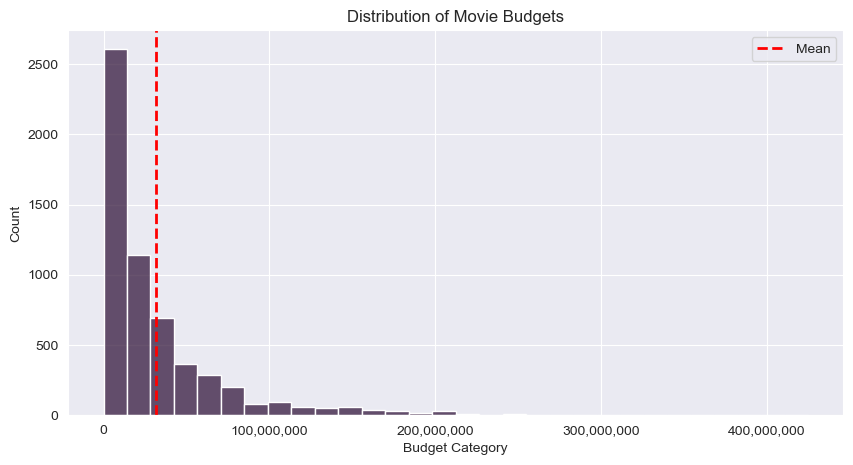

In [29]:
# Plot the distribution of movie budgets
sns.set_style('darkgrid')
sns.set_palette('rocket')
plt.figure(figsize=(10, 5))
sns.histplot(movie_budgets['production_budget'], bins=30)

# Plot a vertical line for the mean
plt.axvline(movie_budgets['production_budget'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.title('Distribution of Movie Budgets')
plt.xlabel('Budget Category')
plt.ylabel('Count')

# Format the x-axis numbers easier to read with commas and no decimals
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.legend()
plt.show()

> The histogram shows a left-skewed distribution meaning majority of the movies have lower production budge. This suggests that lower-budget films are more common

The next step is to bin the `production_budget` column into three categories: low, medium and high. The bins will be defined as follows:
* Low: 0 - 40,000,000
* Medium: 40,000,000 - 100,000,000
* High: 100,000,000 - column's maximum value

In [30]:
#  Bin the production budget into three categories: Low, Medium, High

# Create the labels
labels = ['Low', 'Medium', 'High']

# Create the bins
bins = [0, 40000000, 100000000, movie_budgets['production_budget'].max()]

# Copy movie_budgets to a new df for binning
binned_budgets = movie_budgets.copy()

# Bin the budgets using pd.cut method
binned_budgets['budget_category'] = pd.cut(binned_budgets['production_budget'], bins=bins, labels=labels)
counts = binned_budgets.value_counts('budget_category').to_frame(name = 'count')
counts.reset_index(inplace=True)
counts

,budget_category,count
0,Low,4408
1,Medium,1011
2,High,363


Visualize the distribution of the `production_budget` column after binning:

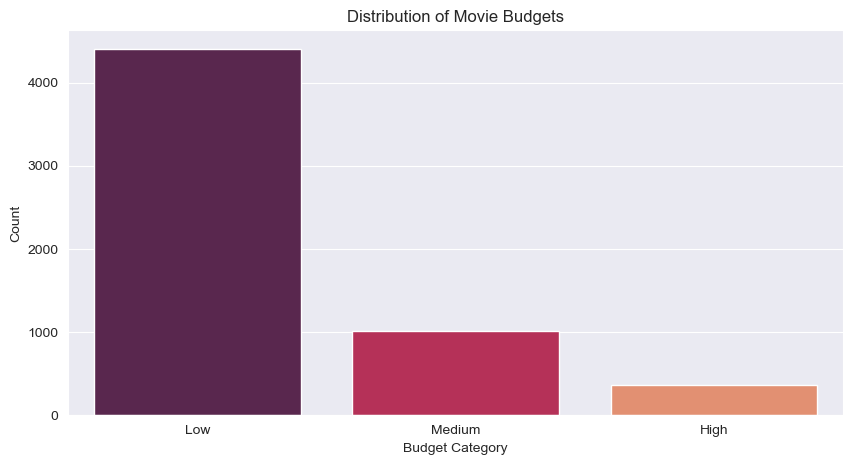

In [31]:
# Create a visualization of the distribution of movie budgets
plt.figure(figsize=(10, 5))
sns.set_style('darkgrid')
sns.barplot(x='budget_category', y='count', data=counts, hue='budget_category', palette='rocket')
plt.title('Distribution of Movie Budgets')
plt.xlabel('Budget Category')
plt.ylabel('Count')
plt.show();

> The low budget category has the highest count and by a big margin this suggests that most studios
prefer low financial risk and avoid massive investment

Let's recreate the similar steps for the `worldwide_gross` column:

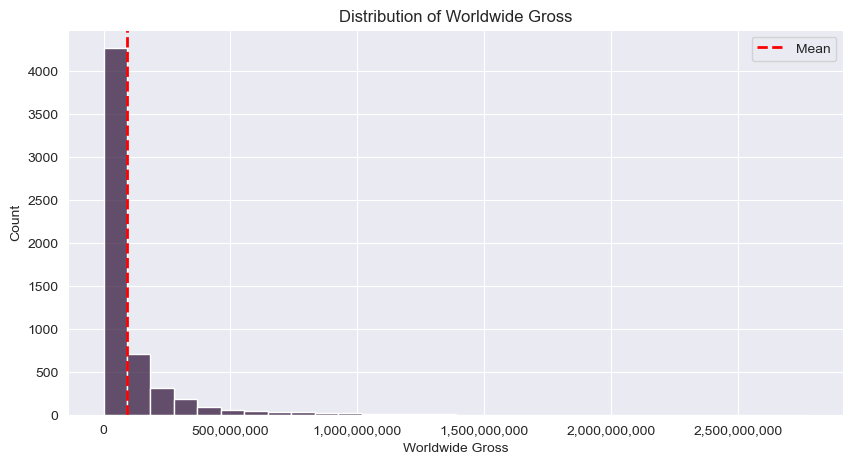

In [32]:
# Create a visualization of the distribution of worldwide gross
plt.figure(figsize=(10, 5))
sns.histplot(movie_budgets['worldwide_gross'], bins=30)
plt.title('Distribution of Worldwide Gross')
plt.xlabel('Worldwide Gross')
plt.ylabel('Count')

# Plot a vertical line for the mean
plt.axvline(movie_budgets['worldwide_gross'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')

# Format the x-axis numbers easier to read with commas and no decimals
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.legend()
plt.show()

> The histogram is right-skewed meaning most genres have a lower worldwide gross while very few have high revenue

In [33]:
# Bin the worldwide gross into three categories: Low, Medium, High
bins = [0, 25000000, 100000000, binned_budgets['worldwide_gross'].max()]
labels = ['Low', 'Medium', 'High']
binned_budgets['gross_category'] = pd.cut(binned_budgets['worldwide_gross'], bins=bins, labels=labels)
counts1 = binned_budgets.value_counts('gross_category').to_frame(name = 'count')
counts1.reset_index(inplace=True)
counts1.head()

,gross_category,count
0,Low,2399
1,Medium,1602
2,High,1414


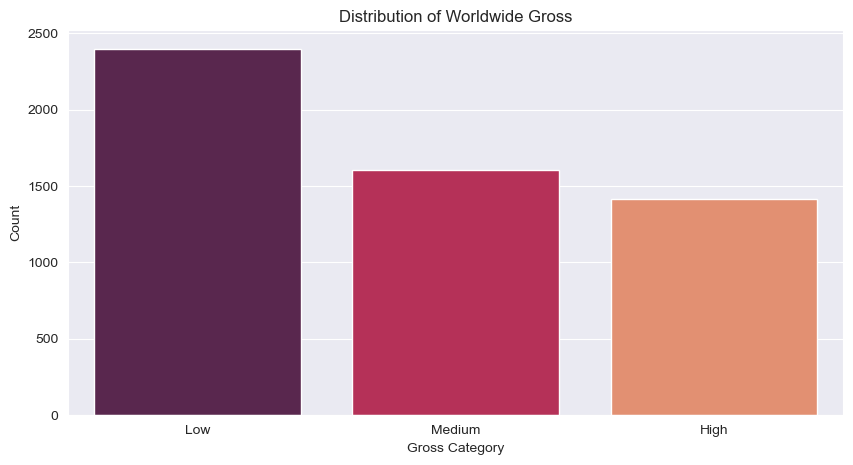

In [34]:
# Plot the distribution of worldwide gross categories
plt.figure(figsize=(10, 5))
sns.barplot(x='gross_category',y='count', data=counts1, hue='gross_category', palette='rocket')
plt.title('Distribution of Worldwide Gross')
plt.xlabel('Gross Category')
plt.ylabel('Count')
plt.show()

> The worldwide gross revenue has been categorized into bins, which show that the majority of movies fall within the low worldwide gross category. This confirms that most films generate relatively lower revenue, while only a few achieve high earnings.

### IMDB 

For this database, the first step will be to assign the relevant tables to a dataframe for easier manipulation. The tables to be assigned are:

In [35]:
# Assign the movie_basics info to movie_basics df
movie_basics = pd.read_sql("""
SELECT 
    movie_id, primary_title, genres
FROM movie_basics""",conn)
movie_basics.head()

,movie_id,primary_title,genres
0,tt0063540,Sunghursh,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,Drama
3,tt0069204,Sabse Bada Sukh,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy"


In [36]:
# Assign the ovie ratings info to movie_ratiings df
movie_ratings = pd.read_sql("""
SELECT
    movie_id, averagerating
FROM movie_ratings""",conn)
movie_ratings.head()

,movie_id,averagerating
0,tt10356526,8.3
1,tt10384606,8.9
2,tt1042974,6.4
3,tt1043726,4.2
4,tt1060240,6.5


In [37]:
# Assign the directors to directors df
directors = pd.read_sql("""
SELECT 
    movie_id, person_id, primary_name AS director_name
FROM directors
INNER JOIN persons
USING(person_id)
""",conn)
directors.head()

,movie_id,person_id,director_name
0,tt0285252,nm0899854,Tony Vitale
1,tt0462036,nm1940585,Bill Haley
2,tt0835418,nm0151540,Jay Chandrasekhar
3,tt0878654,nm0089502,Albert Pyun
4,tt0878654,nm2291498,Joe Baile


In [38]:
# Assign actors in the database to a actors df
actors = pd.read_sql("""
SELECT 
    movie_id, person_id, primary_name AS actor_name
FROM principals
INNER JOIN persons
USING(person_id)
WHERE category = 'actor' 
""",conn)
actors.head()

,movie_id,person_id,actor_name
0,tt0111414,nm0246005,Tommy Dysart
1,tt0323808,nm2694680,Henry Garrett
2,tt0323808,nm0574615,Graham McTavish
3,tt0417610,nm0532721,Luis Machín
4,tt0417610,nm0069209,Carlos Belloso


Preview the `movie_basics` df once more to check for any discrepancies:

In [39]:
# Preview the df
movie_basics.head()

,movie_id,primary_title,genres
0,tt0063540,Sunghursh,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,Drama
3,tt0069204,Sabse Bada Sukh,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy"


One think to note is that the `genres` column contains multiple genres for some movies. This means that we will need to split the genres into separate columns for easier analysis and visualization in later steps. The first step will be to split the genres into a list using `.split` method. The`.explode` method will then be used to transform each element in the list into a separaterow, replicating the values of the parent column.

In [40]:
# Explode the genres column in the movie_basics DataFrame
movie_basics['genres'] = movie_basics['genres'].str.split(',')
movie_basics_exploded = movie_basics.explode('genres')

Now that the genres problem has been solved, we can now mege the new `movie_basics_exploded` and `movie_ratings` tables. The `movie_id` column will be used as the key to join the two tables. The `how` parameter will be set to 'inner' to ensure that only rows with matching movie_ids in both tables are included in the final dataframe.

In [41]:
# Merge the movie basics exploded df with the movie ratings df
imdb_exploded = movie_basics_exploded.merge(movie_ratings, on='movie_id', how='inner')
imdb_exploded.head()

,movie_id,primary_title,genres,averagerating
0,tt0063540,Sunghursh,Action,7.0
1,tt0063540,Sunghursh,Crime,7.0
2,tt0063540,Sunghursh,Drama,7.0
3,tt0066787,One Day Before the Rainy Season,Biography,7.2
4,tt0066787,One Day Before the Rainy Season,Drama,7.2


Next, merge the `movie_basics_exploded` and `directors` tables. The `primary_title` and the 'movie' columns will be used as the keys to join the two tables and the `how` parameter set to 'inner' to ensure that only rows with matching movie_ids in both tables are included in the final dataframe.

In [42]:
# Merge the exploded imdb dataframe with the movie_budgets dataframe
imdb_revenue_exploded = imdb_exploded.merge(movie_budgets, left_on='primary_title', right_on='movie', how='inner')

imdb_revenue_exploded.head()

,movie_id,primary_title,genres,averagerating,movie,production_budget,worldwide_gross
0,tt0249516,Foodfight!,Action,1.9,Foodfight!,45000000,73706
1,tt0249516,Foodfight!,Animation,1.9,Foodfight!,45000000,73706
2,tt0249516,Foodfight!,Comedy,1.9,Foodfight!,45000000,73706
3,tt0337692,On the Road,Adventure,6.1,On the Road,25000000,9313302
4,tt0337692,On the Road,Drama,6.1,On the Road,25000000,9313302


Merge the `idb_revenue_exploded` and `movie_budgets` tables. The `movie_id` colum is the common column between the two dataframes will be used as the key to join the two tables. Similar to the steps above, the `how` parameter set to 'inner' to ensure that only rows with matching movie_ids in both tables are included in the final dataframe.

In [43]:
# Merge the imdb df with the directors df
imdb_directors = imdb_revenue_exploded.merge(directors, on='movie_id', how='inner')

# Drop any irrelevant columns
imdb_directors = imdb_directors.drop(columns=['person_id'])
imdb_directors.head()

,movie_id,primary_title,genres,averagerating,movie,production_budget,worldwide_gross,director_name
0,tt0249516,Foodfight!,Action,1.9,Foodfight!,45000000,73706,Lawrence Kasanoff
1,tt0249516,Foodfight!,Animation,1.9,Foodfight!,45000000,73706,Lawrence Kasanoff
2,tt0249516,Foodfight!,Comedy,1.9,Foodfight!,45000000,73706,Lawrence Kasanoff
3,tt0337692,On the Road,Adventure,6.1,On the Road,25000000,9313302,Walter Salles
4,tt0337692,On the Road,Drama,6.1,On the Road,25000000,9313302,Walter Salles


Finally, the `imdb_directors` dataframe will be joined with the `actors` dataframe using the `movie_id` column as the key:

In [44]:
# Merge the imdb_directors df with the actors df
imdb_crew = imdb_directors.merge(actors, on='movie_id', how='inner')

# Drop any irrelevant columns
imdb_crew = imdb_crew.drop(columns=['person_id','movie'], axis=1)
imdb_crew.head()

,movie_id,primary_title,genres,averagerating,production_budget,worldwide_gross,director_name,actor_name
0,tt0249516,Foodfight!,Action,1.9,45000000,73706,Lawrence Kasanoff,Charlie Sheen
1,tt0249516,Foodfight!,Animation,1.9,45000000,73706,Lawrence Kasanoff,Charlie Sheen
2,tt0249516,Foodfight!,Comedy,1.9,45000000,73706,Lawrence Kasanoff,Charlie Sheen
3,tt0337692,On the Road,Adventure,6.1,25000000,9313302,Walter Salles,Sam Riley
4,tt0337692,On the Road,Adventure,6.1,25000000,9313302,Walter Salles,Garrett Hedlund


The data has been cleaned and prepared for analysis. The next step will be to perform exploratory data analysis (EDA) to gain insights into the data and answer the business questions.

# Exploratory Data Analysis (EDA)
---

An integral step in this analysis will be to analyze whether there is a correlation between the revenue and the movie rating. This will aid in figuring out whether one of these two performance indicators can be used in place of the other. This will be done by performing a correlation test of the two columns then plotting a regression plot of the `worldwide_gross` and `average_rating`columns to visualize the relationship.

In [45]:
# Perform a correlation test between average rating and worldwide gross
imdb_revenue_exploded[['averagerating','worldwide_gross']].corr()

,averagerating,worldwide_gross
averagerating,1.000000,0.207281
worldwide_gross,0.207281,1.000000


The two columns have a correlation coefficient of **0.207281**. This indicates a weak positive correlation between the two variables.

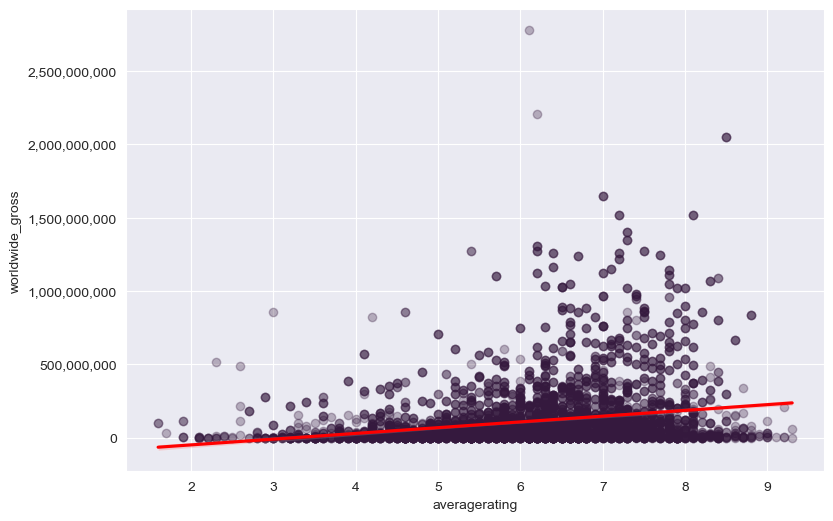

In [46]:
# Create a regression plot to visualize the relationship between average rating and worldwide gross
plt.figure(figsize=(9,6))
sns.regplot(x='averagerating', 
            y='worldwide_gross', 
            data=imdb_revenue_exploded, 
            scatter_kws={'alpha':0.3},
            line_kws={'color':'red'})
# Ensure that the full revenue amounts are displayed
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.show()

---

### Objective 1: To determine which movie genres perform highly in terms of revenue and viewer rating.
>**Hypothesis**
>
>H0 - There is not significant difference between genres and average rating
>
>H1 - There is significant difference between genres and average rating

First, we will visualize the average rating by genre to distinguish genres that have high rating

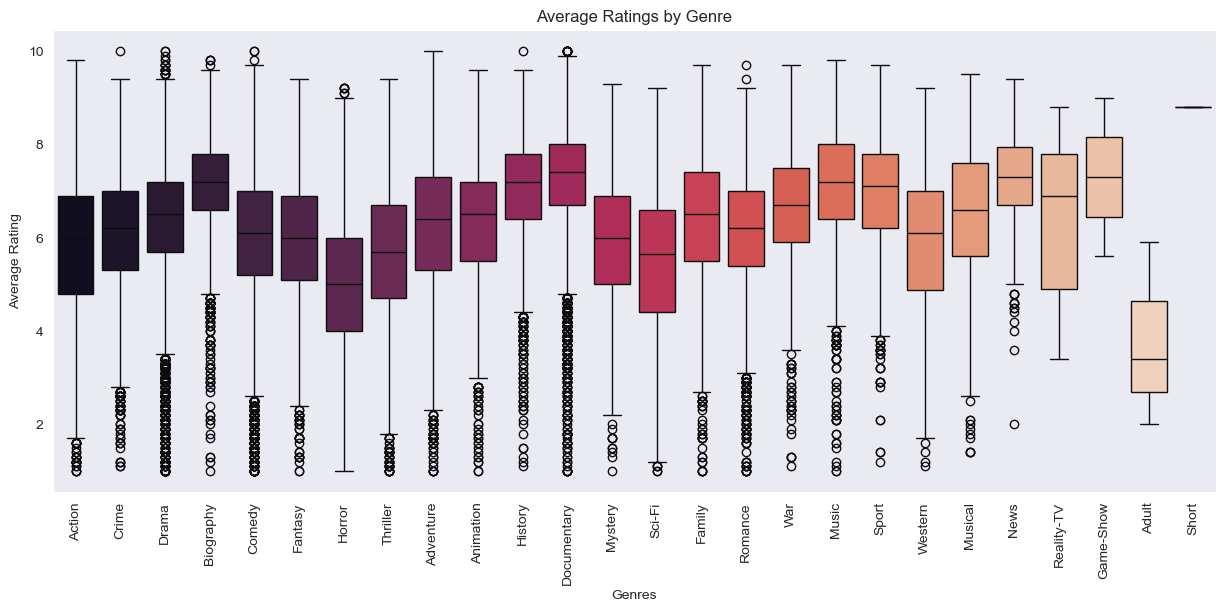

In [47]:
# Visualize the average rating by genre
sns.set_style('dark')
plt.figure(figsize=(15,6))
sns.boxplot(x='genres', y='averagerating', data=imdb_exploded, hue='genres', palette='rocket')
plt.title('Average Ratings by Genre')
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

**Group by genre and calculate the average rating**                                                 
Calculation of average rating and grouping by genre will help us examine genres that have acquired high rating

In [48]:
# Group by genre and calculate the average rating
best_genres = imdb_exploded.groupby('genres')['averagerating'].mean().sort_values(ascending=False).head(10).to_frame()
best_genres.reset_index(inplace=True)
best_genres

,genres,averagerating
0,Short,8.800000
1,Documentary,7.332090
2,Game-Show,7.300000
3,News,7.271330
4,Biography,7.162274
5,Music,7.091972
6,History,7.040956
7,Sport,6.961493
8,War,6.584291
9,Reality-TV,6.500000


**Visualization of the above using a bar plot;**

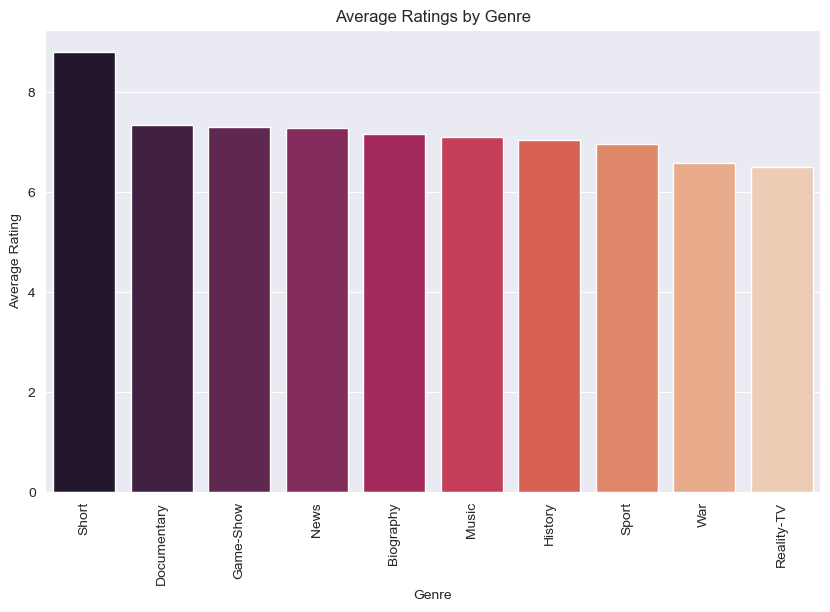

In [49]:
# Visualize the average rating by genre using a bar plot
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
sns.barplot(x='genres', y='averagerating', data=best_genres, hue='genres', palette='rocket')
plt.title('Average Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

**Group by genre and calculate the average worldwide gross**                                                      
We examine the genres that have attracted highest worldwide gross through calculation of the average world gross and grouping by genre

In [50]:
# Group by genre and calculate the average worldwide gross
genre_revenue = imdb_revenue_exploded.groupby('genres')['worldwide_gross'].mean().sort_values(ascending=False).to_frame().head(10)
genre_revenue.reset_index(inplace=True)

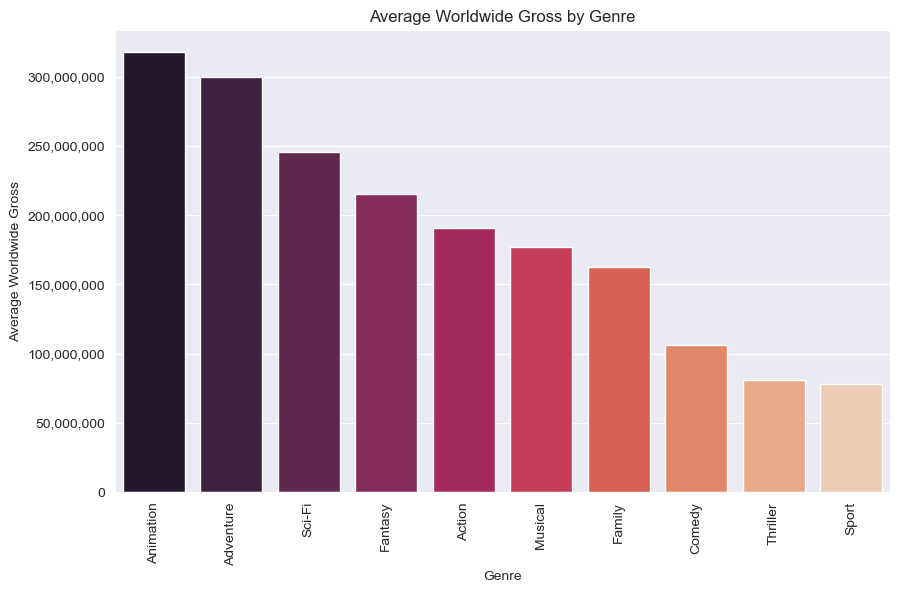

In [51]:
# Visualize the average worldwide gross by genre using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='genres',y='worldwide_gross', data=genre_revenue, hue='genres', palette='rocket')

# Format the x-axis numbers easier to read with commas and no decimals
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.title('Average Worldwide Gross by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Worldwide Gross')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Create a list of the top five genres by worldwide gross
genre_list = genre_revenue['genres'].head().to_list()

### Hypothesis Test

**Check If there is significant difference in Average ratings between genres**

***H0**: There is no significant difference in average ratings between genres*

***H1**: There is a significant difference in average ratings between genres*

Hypothesis Test - **ANOVA**

In [53]:
# Perform ANOVA to check if there is a significant difference in average ratings between genres
anova_data = [imdb_exploded[imdb_exploded['genres'] == genre]['averagerating'] for genre in genre_list]
f_stat, p_val = stats.f_oneway(*anova_data)
print(p_val)
if p_val < 0.05:
    print("Reject H0: There is a significant difference in average ratings between genres.")
else:
    print("Fail to reject H0: {There is no significant difference in average ratings between genres.}")


0.0
Reject H0: There is a significant difference in average ratings between genres.


**Interpretation:**                                                                
From the above, there is statistical evidence that average ratings significantly 
differ between at least some genres.                                                                      
This reveals that there are audience rating biases or preferences across diffrerent genres.



**Findings**
1. Top 3 Genre that performs well in worldwide gross are **Animations** ,**Adventure** and **Sci-Fi**
2. Genres with high average ratings are **Short**, **Documentary** and **Game Show** with 8.80,7.33 and 7.30 rating respectively

---

### Objective 2: To determine which directors and actors are linked to the highest performing movies.

This objective will generate insight on the best directors and actors in their fields. This will enable the Microsoft Team to make informed decisions on which actors and directors to hire for their movies. 
The directors and actors will be selected only from the top 5 genres that perform highly in terms of revenue and their average rating compared to come up with a list of the best directors and actors that garner the highest ratings in each genre. 

The steps to be followed are:
* Select the top 5 genres that perform highly in terms of revenue (this has been done in the previous objective by the creation of `genre_list`).
* Create a new dataframe `imdb_genre_filtered_d` and `imdb_genre_filtered_c` that will contain the a list of directors and actors that are linked to the top 10 genres respectively.
* Group the dataframe by the `directors` and `genres` columns and calculate the average rating for each director in each genre.
* Create a bar chart plot containing the top 5 directors and actors in each genre in terms of average rating.

Step 1: Select the top 5 genres that perform highly in terms of revenue (this has been done in the previous objective so on to the next objective).



In [73]:
# Let's call out the list once more
genre_list

['Animation', 'Adventure', 'Sci-Fi', 'Fantasy', 'Action']

Step 2: Let's create a new dataframe named `imdb_filtered_d` which contains a list of directors that are assicated with the top 5 revenue-generating genres.

In [74]:
# Filter the imdb_directors dataframe to include genres that are in the genre_list
imdb_genre_filtered_d = imdb_crew[imdb_crew['genres'].isin(genre_list)]

Step 3: Group the dataframe by the `directors` and `genres` columns and calculate the average rating for each director in each genre. 

This will give us a list of directors and their average ratings in each genre.

In [75]:
# Group the dataframe by director_name and genres column and find the average rating of each director
# Include the as_index=False parameter to ensure grouping columns are retained as normal columns instead of being set as the index.
directors_filtered = imdb_genre_filtered_d.groupby(['director_name','genres'], as_index=False)['averagerating'].mean()

# Preview the df
directors_filtered.head()

,director_name,genres,averagerating
0,Adam Brooks,Action,6.0
1,Adam Ciancio,Sci-Fi,6.4
2,Adam Green,Adventure,6.2
3,Adam McKay,Action,6.7
4,Adam Shankman,Fantasy,4.9


Step 4: Create a bar chart plot containing the top 5 directors in each genre in terms of average rating. This will give us a visual representation of the best directors in each genre.

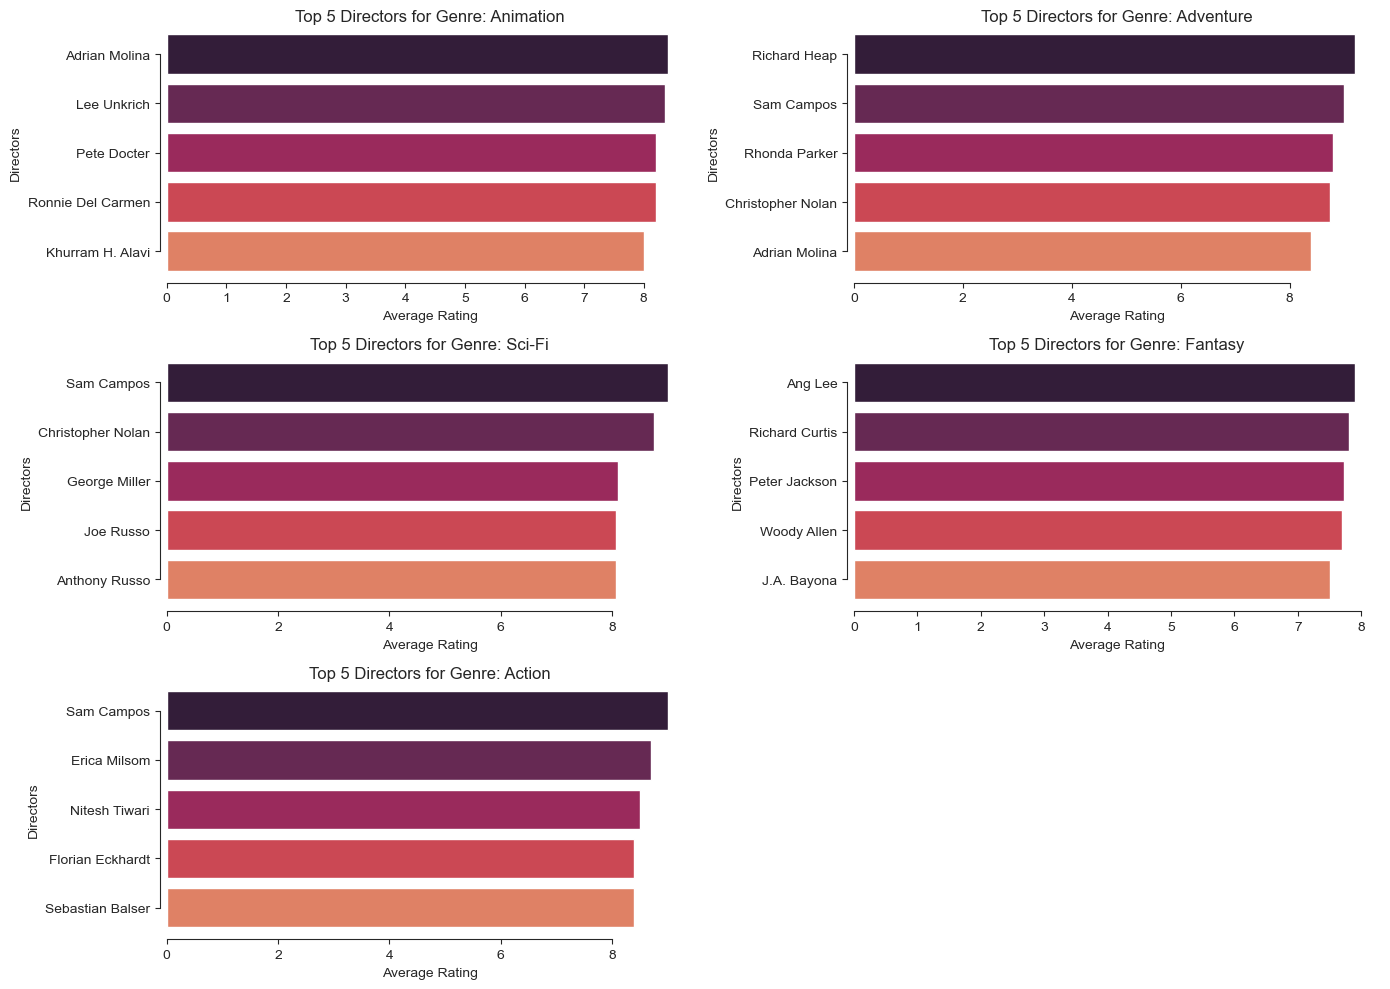

In [84]:
# Visualize the average rating by director for the top 10 genres
sns.set_style('ticks')
sns.set_palette('rocket')

# Create a subplot grid with 5 columns and 2 rows to accomodate 10 plots; one for each genre
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14,10))

# Create a bar plot for each genre. 
# Loop through the top 10 genres to generate individual plots for each genre together with the top 5 directors

for i in range(5):
    row = i//2 # Calculate the row index of each plot
    col = i%2 # Calculate the column index of each plot

    # Filter data for the current genre, sort directors by average rating and select the top 5 directors
    top_5_directors = directors_filtered[directors_filtered['genres'] == genre_list[i]].sort_values(by='averagerating', ascending=False).head()
    sns.barplot(y='director_name', x='averagerating', data=top_5_directors, hue='director_name', ax=axes[row][col])
    # Customize the current subplot's labels and title
    axes[row][col].set_ylabel('Directors')
    axes[row][col].set_xlabel('Average Rating')
    axes[row][col].set_title(f"Top 5 Directors for Genre: {genre_list[i]}")
    

# Adjust the plot to avoid overlapping
axes[2][1].set_visible(False)
sns.despine(offset=5, trim=True)
plt.tight_layout()
plt.show() 

This visualization will help us to identify the best directors in each genre and help Microsoft in making informed decisions on which directors to hire for their movies depending on the genre.

The last step remaining is to create a dataframe containing the the top 5 directors showcased in the bar chart linked to their respective genres:

In [92]:
# Initialize an empty dict
d_recommendations = {}
# Loop over each genre in the genre_list and filter out the top 5 directors
for genre in genre_list:
    directors = directors_filtered[directors_filtered['genres'] == genre].sort_values(by='averagerating', ascending=False).head()

    # Set the dict key as the genre and the values as a list of the top 5 directors in that genre
    d_recommendations[genre] = directors['director_name'].to_list()

# Convert the list into a df
director_recommendations = pd.DataFrame(d_recommendations)

Next, let's carry out the same steps for actors. We will create a new dataframe named `imdb_filtered_c` which contains a list of actors that are associated with the top 10 revenue-generating genres. We will then group the dataframe by the `actors` and `genres` columns and calculate the average rating for each actor in each genre. Finally, we will create a bar chart plot containing the top 5 actors in each genre in terms of average rating.


Step 1: Select the top 10 genres that perform highly in terms of revenue (this has been done in the previous objective so on to the next objective).

Step 2: Let's create a new dataframe named `imdb_filtered_c` which contains a list of actors that are assicated with the top 10 revenue-generating genres.

In [59]:
# Filter the imdb_crew dataframe to include genres that are in the genre_list
imdb_genre_filtered_c = imdb_crew[imdb_crew['genres'].isin(genre_list)]

# Preview the df
imdb_genre_filtered_c.head()

,movie_id,primary_title,genres,averagerating,production_budget,worldwide_gross,director_name,actor_name
0,tt0249516,Foodfight!,Action,1.9,45000000,73706,Lawrence Kasanoff,Charlie Sheen
1,tt0249516,Foodfight!,Animation,1.9,45000000,73706,Lawrence Kasanoff,Charlie Sheen
2,tt0249516,Foodfight!,Comedy,1.9,45000000,73706,Lawrence Kasanoff,Charlie Sheen
3,tt0337692,On the Road,Adventure,6.1,25000000,9313302,Walter Salles,Sam Riley
4,tt0337692,On the Road,Adventure,6.1,25000000,9313302,Walter Salles,Garrett Hedlund


Step 3: Group the dataframe by the `actors` and `genres` columns and calculate the average rating for each actor in each genre. This will give us a list of actors and their average ratings in each genre.

Step 4: Create a bar chart plot containing the top 5 actors in each genre in terms of average rating. This will give us a visual representation of the best actors in each genre.

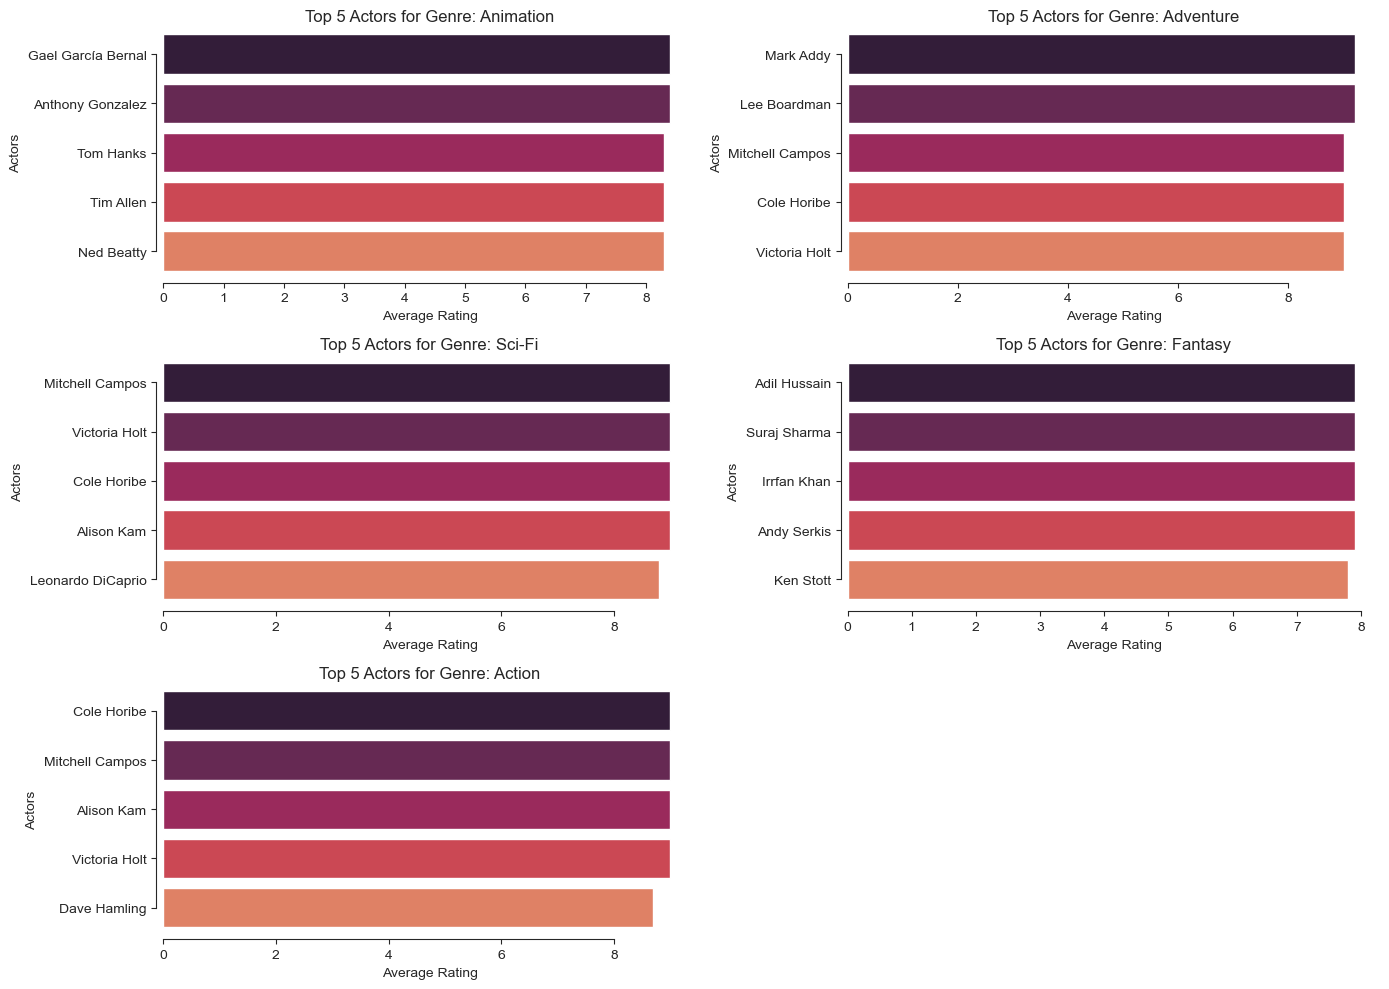

In [88]:
# Visualize the average rating by actor for the top 10 genres
# Create a subplot grid with 5 columns and 2 rows to accomodate 10 plots; one for each genre
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14,10))
sns.set_palette('rocket')
# Create a bar plot for each genre. 
# Loop through the top 10 genres to generate individual plots for each genre together with the top 5 actors

for i in range(5):
    row = i//2 # Calculate the row index of each plot
    col = i%2 # Calculate the column index of each plot

    # Filter data for the current genre, sort actors by average rating and select the top 5actors
    top_5_actors = actors_filtered[actors_filtered['genres'] == genre_list[i]].sort_values(by='averagerating', ascending=False).head()
    sns.barplot(y='actor_name', x='averagerating', data=top_5_actors, hue='actor_name',ax=axes[row][col])
    # Customize the current subplot's labels and title
    axes[row][col].set_ylabel('Actors')
    axes[row][col].set_xlabel('Average Rating')
    axes[row][col].set_title(f"Top 5 Actors for Genre: {genre_list[i]}")

# Adjust the plot to avoid overlapping
axes[2][1].set_visible(False)
sns.despine(offset=5, trim=True)
plt.tight_layout()
plt.show() 

This visualization presents the average rating for each actor within their respective genres, making it easy to identify the top-performing actors for each genre.

The final task is to construct a dataframe featuring the top 5 actors displayed in the bar chart along with their corresponding genres:

In [89]:
# Initialize an empty dict
c_recommendations = {}
# Loop over each genre in the genre_list and filter out the top 5 actors
for genre in genre_list:
    actors = actors_filtered[actors_filtered['genres'] == genre].sort_values(by='averagerating', ascending=False).head()

    # Set the dict key as the genre and the values as a list of the top 5 actors in that genre
    c_recommendations[genre] = actors['actor_name'].to_list()

# Convert the list into a df
actors_recommendations = pd.DataFrame(c_recommendations)


**Findings**

The top 5 directors in each of the high performing genres are:


In [93]:
# Call out the df
director_recommendations

,Animation,Adventure,Sci-Fi,Fantasy,Action
0,Adrian Molina,Richard Heap,Sam Campos,Ang Lee,Sam Campos
1,Lee Unkrich,Sam Campos,Christopher Nolan,Richard Curtis,Erica Milsom
2,Pete Docter,Rhonda Parker,George Miller,Peter Jackson,Nitesh Tiwari
3,Ronnie Del Carmen,Christopher Nolan,Joe Russo,Woody Allen,Florian Eckhardt
4,Khurram H. Alavi,Adrian Molina,Anthony Russo,J.A. Bayona,Sebastian Balser


The top 5 actors in each of the high performing genres are:

In [91]:
# Call out the recommendations
actors_recommendations

,Animation,Adventure,Sci-Fi,Fantasy,Action
0,Gael García Bernal,Mark Addy,Mitchell Campos,Adil Hussain,Cole Horibe
1,Anthony Gonzalez,Lee Boardman,Victoria Holt,Suraj Sharma,Mitchell Campos
2,Tom Hanks,Mitchell Campos,Cole Horibe,Irrfan Khan,Alison Kam
3,Tim Allen,Cole Horibe,Alison Kam,Andy Serkis,Victoria Holt
4,Ned Beatty,Victoria Holt,Leonardo DiCaprio,Ken Stott,Dave Hamling


---

## Objective 3: To determine whether movie budget affects the overall performance of a movie.
>**Hypothesis**
>
>H0 - There is no association between the production budget and the generated worldwide revenue
>
>H1 - There is a significant association between production budget and the generated worldwide revenue

First, we will visualize the average rating by genre to distinguish genres that have high rating

In [65]:
# display the first few rows
#insight shows that both the production budget and gross revenue are categorized, 
#allowing for comparisons across these bins.
binned_budgets.head() 

,movie,production_budget,worldwide_gross,budget_category,gross_category
id,,,,,
1,Avatar,425000000,2776345279,High,High
2,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,High,High
3,Dark Phoenix,350000000,149762350,High,High
4,Avengers: Age of Ultron,330600000,1403013963,High,High
5,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747,High,High


### Hypothesis testing using Pearson correlation and Chi-squared test

> To check if the relationship between production budget and worldwide gross is statistically significant

##### 1. Pearson correlation 
> This measures the strength  and direction of the linear relationship between the two continuous variables

In [66]:
# Perform a Pearson correlation test between production budget and worldwide gross
pearson_coef, p_value = stats.pearsonr(binned_budgets['worldwide_gross'], binned_budgets['production_budget'])
print(f'The Pearson Corelation Coefficient is {pearson_coef}')
print(f'The P Value is {p_value}')
if p_value < 0.05:
    print('Reject H0 - There is a significant association between production budget and the generated worldwide revenue')
else: print(f'Accept H0 - {H0}')

The Pearson Corelation Coefficient is 0.7483059765694756
The P Value is 0.0
Reject H0 - There is a significant association between production budget and the generated worldwide revenue


> **Insight:** The pearson Corelation Coefficient is **0.74**, indicating a **strong positive relationship** between production budget and worldwide revenue. 
> Additionally **the null hypothesis was rejected** confirming that this relationship
is statistically significant. This suggests that higher movie budgets are strongly associated with higher revenue and vice versa


##### 2. Chi-Squared Test 
> Measures the association between  the two categories thus helping us to know if high-budget movies are more likely to fall into higher revenue categories and while low-budget movies are more likely to fall into lower revenue categories 

In [67]:
# Perform a chi-squared test to check for association between production budget and worldwide gross categories
# Create a contingency table for the chi-squared test
crosstab = pd.crosstab(binned_budgets['budget_category'],binned_budgets['gross_category'])
chi2, p_value, dof, expected = stats.chi2_contingency(crosstab)
print(p_val)
if p_value < 0.05:
    print('Reject H0 - There is a significant association between production budget and the generated worldwide revenue')
else: print(f'Accept H0 - {H0}')

0.0
Reject H0 - There is a significant association between production budget and the generated worldwide revenue


**Insight:** Since the null hypothesis was rejected it confirms that production budget is significantly associated with worldwide revenue

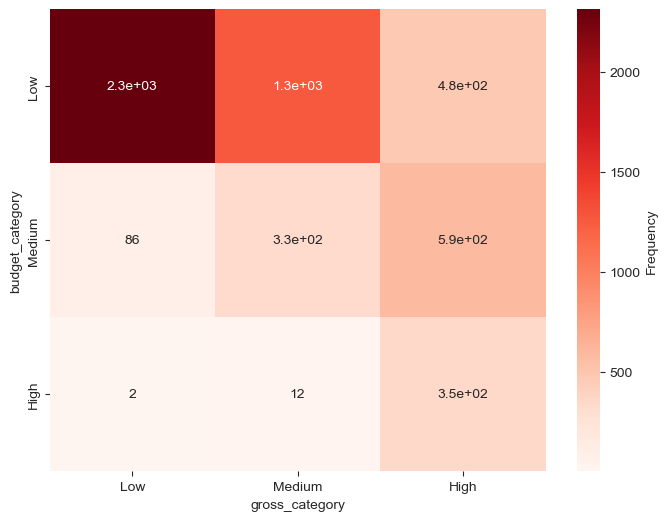

In [68]:
# Create a heatmap to visualize the association between production budget and worldwide gross categories
plt.figure(figsize=(8,6))
sns.heatmap(crosstab, cmap='Reds', cbar_kws={'label': 'Frequency'},annot=True)
plt.show()

> The heatmap  aligns with the conclusion drawn from the hypothesis test

# Recommendations

**Ojective 1: To determine which movie genres perform highly in terms of revenue and viewer rating.**   


The studio should focus on producing genres that yield higher worldwide gross which are **Animations, Adventure and Sci-Fi** and genre that have higher viewer satisfaction/rating which are **Short films, Documentary and Game-Shows**. Focusing on these two aspects will lead to revenue maximization and enhance the brand's reputation

---


**Objective 2: To determine which directors and actors are linked to the highest performing movies.**

The aim of this objective was to uncover the best directors and actors that excel in each of the genres. This would in turn help the Microsoft Team make an informed decision on which actors and directors to hire in each genre. The insight uncovered from this objective was in form of a dataframe that contained names of each actor and director that exceled in their respective fields. This would be very beneficial as the Microsoft Team would be able to pick out directors and actors they needed depending on the genre of their choosing. The two dataframes are highlighted below:

In [94]:
# Actors recommendations
actors_recommendations

,Animation,Adventure,Sci-Fi,Fantasy,Action
0,Gael García Bernal,Mark Addy,Mitchell Campos,Adil Hussain,Cole Horibe
1,Anthony Gonzalez,Lee Boardman,Victoria Holt,Suraj Sharma,Mitchell Campos
2,Tom Hanks,Mitchell Campos,Cole Horibe,Irrfan Khan,Alison Kam
3,Tim Allen,Cole Horibe,Alison Kam,Andy Serkis,Victoria Holt
4,Ned Beatty,Victoria Holt,Leonardo DiCaprio,Ken Stott,Dave Hamling


In [95]:
# Directors recommendations
director_recommendations

,Animation,Adventure,Sci-Fi,Fantasy,Action
0,Adrian Molina,Richard Heap,Sam Campos,Ang Lee,Sam Campos
1,Lee Unkrich,Sam Campos,Christopher Nolan,Richard Curtis,Erica Milsom
2,Pete Docter,Rhonda Parker,George Miller,Peter Jackson,Nitesh Tiwari
3,Ronnie Del Carmen,Christopher Nolan,Joe Russo,Woody Allen,Florian Eckhardt
4,Khurram H. Alavi,Adrian Molina,Anthony Russo,J.A. Bayona,Sebastian Balser


**Objective 3: To determine whether movie budget affects the overall performance of a movie.**

The studio should consider investing in higher budget movies, as there is statistical evidence to show that higher-budget films are linked to an increased revenue potential. This can maximize financial returns thus ensuring a successful production.

# Conclusion

The studio should focus on producing movies with the **highest worldwide revenue potential**, particularly in genres like **Animation, Adventure, and Sci-Fi**, while also investing in Short Films and Documentaries, which have the highest ratings as they build a strong reputation and viewers actively promote movies they love. 
In these genres, Microsoft Movie Studio should collaborate with **top directors and actors** who are consistently linked to successful films. With these factors in mind, proceed to prioritize **higher-budget movies can maximize revenue**, as they generally yield greater financial returns. However, careful budgeting is essential—not all high-budget films guarantee high revenue, so strategic spending should be emphasized.

# 